In [26]:
import requests

import cv2
import numpy
from matplotlib import pyplot

def show_image(img):
  width = 15;
  height = img.shape[0] // (img.shape[1] / width);
  pyplot.figure(figsize=(width, height))
  pyplot.axis("off")
  pyplot.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [5]:
runspaces_root = 'F:\Projects\skillbox.python.webinar.2020-12-14.object.detection\Runspace'
print('runspaces_root:', runspaces_root)

import uuid
import os
runspace_root = os.path.join(runspaces_root, str(uuid.uuid4()))
print('runspace_root:', runspace_root)
os.makedirs(runspace_root)

runspaces_root: F:\Projects\skillbox.python.webinar.2020-12-14.object.detection\Runspace
runspace_root: F:\Projects\skillbox.python.webinar.2020-12-14.object.detection\Runspace/951e0291-5118-4a8e-878a-ab4161be228f


In [27]:
img_path = os.path.join(runspace_root, 'keszthelyi-timi-P25wpQ8ndl8-unsplash.jpg');
print('img_path:', img_path)
img_edited_path = os.path.join(runspace_root, 'keszthelyi-timi-P25wpQ8ndl8-unsplash_edited.jpg');

img_url = 'https://images.unsplash.com/photo-1589828155685-83225f7d91f3?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=2153&q=80'
open(img_path, 'wb').write(requests.get(img_url, allow_redirects = True).content)

img_path: F:\Projects\skillbox.python.webinar.2020-12-14.object.detection\Runspace\39dad10f-d2e5-482f-b0fc-b9b4f06d326d\keszthelyi-timi-P25wpQ8ndl8-unsplash.jpg


1224269

In [35]:
img = cv2.imread(img_path)

In [ ]:
show_image(img)

In [33]:
# adds rectangle around white porshe
pt1 = (1500, 1000)
pt2 = (pt1[0] + 500, pt1[1] + 500)
color = [255, 0, 0]
width = 5;

img = cv2.rectangle(img, pt1, pt2, color, width)

pt3 = (pt1[0], pt1[1] - 50)
pt4 = (pt2[0], pt1[1])
img = cv2.rectangle(img, pt3, pt4, color, width)
img = cv2.rectangle(img, pt3, pt4, color, -1)

pt5 = (pt3[0] + 10, pt4[1] - 10)
img = cv2.putText(img, "Some text", pt5, cv2.FONT_HERSHEY_SIMPLEX, 1, [255, 0, 255], 3)

In [ ]:
#img = cv2.resize(img, (img.shape[1] // 10, img.shape[0] // 10), interpolation = cv2.INTER_AREA);
# flips image horizontally
# ... raw python
height = img.shape[0]
for i in range(0, height):
  width = img[i].shape[0];
  for j in range(0, width // 2):
    img[i][j], img[i][width - 1 - j] = img[i][width - 1 - j].copy(), img[i][j].copy()

In [ ]:
#img = cv2.resize(img, (img.shape[1] // 10, img.shape[0] // 10), interpolation = cv2.INTER_AREA);
# flips image horizontaly
# ... cv2.flip
img = cv2.flip(img, 1)

In [ ]:
#img = cv2.resize(img, (img.shape[1] // 10, img.shape[0] // 10), interpolation = cv2.INTER_AREA);
# flips image vertically
# ... raw python
height = img.shape[0];
for i in range(0, height // 2):
  img[i], img[height - 1 - i] = img[height - 1 - i].copy(), img[i].copy()

In [ ]:
#img = cv2.resize(img, (img.shape[1] // 10, img.shape[0] // 10), interpolation = cv2.INTER_AREA);
# flips image vertically
# ... cv2.flip
img = cv2.flip(img, 0)

In [ ]:
#img = cv2.resize(img, (img.shape[1] // 10, img.shape[0] // 10), interpolation = cv2.INTER_AREA);
# applies sepia
# ... raw python
amount = 0.5 # 0 .. 1
sepia = [
  [0.131 + 0.869 * (1 - amount), 0.534 - 0.534 * (1 - amount), 0.272 - 0.272 * (1 - amount)],
  [0.168 - 0.168 * (1 - amount), 0.686 + 0.314 * (1 - amount), 0.349 - 0.349 * (1 - amount)],
  [0.189 - 0.189 * (1 - amount), 0.769 - 0.769 * (1 - amount), 0.393 + 0.607 * (1 - amount)]
]
for i in range(0, img.shape[0]):
  img[i] = [[int(min(255.0, x)) for x in numpy.matmul(sepia, pixel)] for pixel in img[i]]

In [30]:
#img = cv2.resize(img, (img.shape[1] // 10, img.shape[0] // 10), interpolation = cv2.INTER_AREA);
# applies sepia
# ... cv2.transform
amount = 0.7 # 0 .. 1
img = cv2.transform(img, numpy.matrix([
    [0.272 - 0.272 * (1 - amount), 0.534 - 0.534 * (1 - amount), 0.131 + 0.869 * (1 - amount)],
    [0.349 - 0.349 * (1 - amount), 0.686 + 0.314 * (1 - amount), 0.168 - 0.168 * (1 - amount)],
    [0.393 + 0.607 * (1 - amount), 0.769 - 0.769 * (1 - amount), 0.189 - 0.189 * (1 - amount)]
    ]))
img[numpy.where(img > 255)] = 255

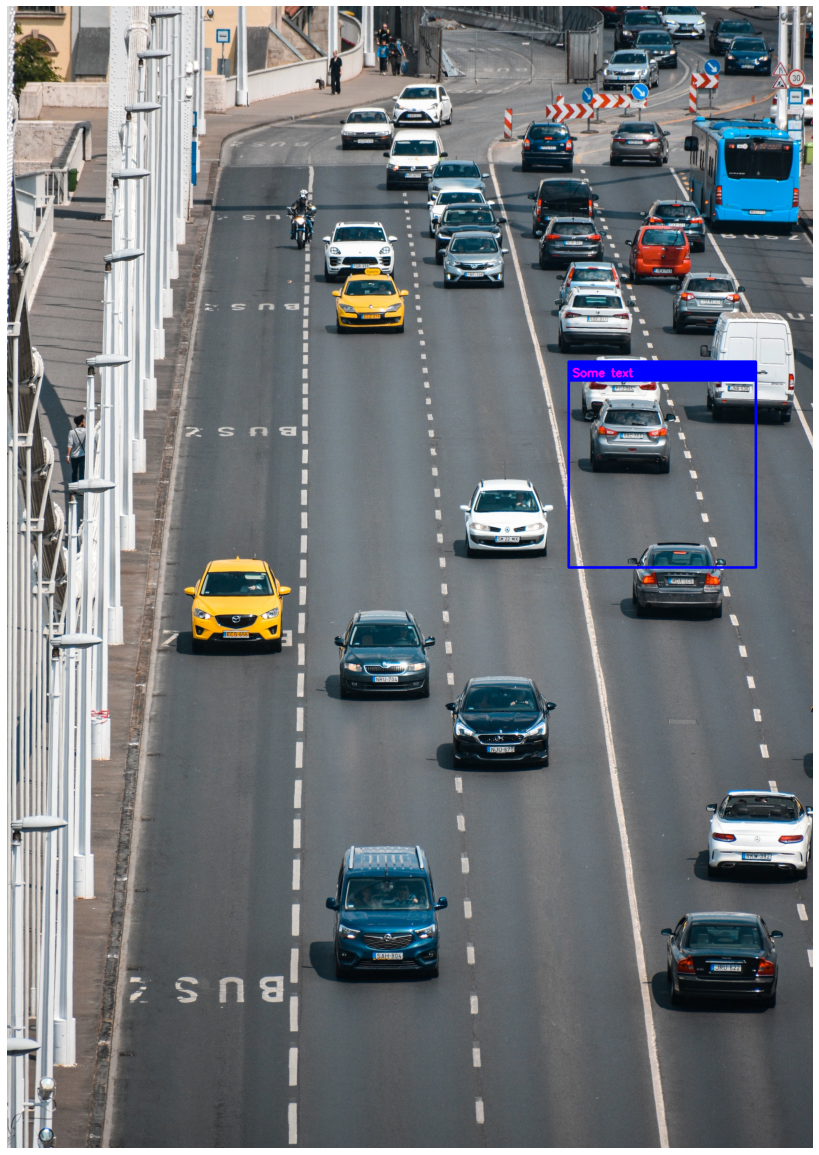

In [34]:
show_image(img)